# 1.Load Package

In [370]:
%matplotlib inline
# data and plotting packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

# 2.Data Preparetion

In [427]:
# load data of tech features
t_df = pd.read_csv('Tech_Features.csv',index_col=0)
f_df = pd.read_csv('Fundamental_features.csv',index_col=0)
display(t_df.head())
display(f_df.head())

,ticker,date,close_price,open_price,high,low,volume
0,A,2015-06-01,39.344406,41.430000,41.430000,40.849998,2440000.0
1,A,2015-06-02,39.527092,40.939999,41.139999,40.669998,2947500.0
2,A,2015-06-03,39.517475,41.310001,41.360001,40.939999,2722100.0
3,A,2015-06-04,38.979042,40.889999,41.080002,40.009998,4091900.0
4,A,2015-06-05,38.757900,40.540001,40.669998,40.200001,1760300.0


,Ticker,enterpriseToRevenue,profitMargins,enterpriseToEbitda,52WeekChange,forwardEps,sharesOutstanding,bookValue,sharesShort,sharesPercentSharesOut,...,pegRatio,forwardPE,maxAge,shortPercentOfFloat,sharesShortPriorMonth,eps,Market Cap,PE,NI,EBIT
0,A,4.306,0.22255,17.757,0.051262617,3.40,3.159930e+08,16.153,4636334.0,0.0146,...,2.30,20.673529,1.0,0.0146,3687978.0,3.443000,2.221115e+10,20.415335,3.160000e+08,9.740000e+08
1,AAL,0.958,0.03215,7.364,-0.2998188,5.76,4.448350e+08,-1.432,20867364.0,0.0469,...,0.41,5.340278,1.0,0.0561,23003563.0,3.118000,1.368313e+10,9.865298,1.412000e+09,3.757000e+09
2,AAP,1.428,0.04448,14.394,0.17042124,9.49,7.132690e+07,49.732,2867611.0,0.0400,...,1.09,16.177029,1.0,0.0471,2882176.0,5.856000,1.095011e+10,26.215847,4.238470e+08,7.121420e+08
3,AAPL,3.511,0.22117,11.732,-0.005647659,12.78,4.601080e+09,22.977,49550348.0,0.0108,...,1.37,15.068858,1.0,0.0105,61003851.0,11.887001,8.860000e+11,16.200891,5.953100e+10,7.089800e+10
4,ABBV,4.507,0.16418,10.552,-0.22391498,9.42,1.478330e+09,-5.294,21309313.0,0.0144,...,1.16,8.168790,1.0,0.0163,27575807.0,3.511000,1.140000e+11,21.916832,5.687000e+09,1.191100e+10


# 2.1 Technical Data

In [416]:
t_df.groupby('ticker').count()

,date,close_price,open_price,high,low,volume
ticker,,,,,,
A,1008,1008,1008,1008,1008,1008
AAL,1008,1008,1008,1008,1008,1008
AAP,1008,1008,1008,1008,1008,1008
AAPL,1008,1008,1008,1008,1008,1008
ABBV,1008,1008,1008,1008,1008,1008
ABC,1008,1008,1008,1008,1008,1008
ABMD,1008,1008,1008,1008,1008,1008
ABT,1008,1008,1008,1008,1008,1008
ACN,1008,1008,1008,1008,1008,1008


In [433]:
t_count = t_df.groupby('ticker')['date'].count()
del_stock=[]
for i in range(len(t_count)):
    if t_count[i]!= 1008:
        del_stock.append(i)
#del_stock

[62,
 91,
 113,
 123,
 133,
 143,
 168,
 169,
 198,
 222,
 229,
 260,
 269,
 284,
 294,
 353,
 375,
 376,
 385,
 450,
 468,
 488,
 500,
 502]

In [232]:
t_df[t_df['open_price'].isnull()].groupby("ticker").count()

,date,close_price,open_price,high,low,volume
ticker,,,,,,
BBT,37,0,0,0,0,0
CF,37,0,0,0,0,0
COTY,37,0,0,0,0,0
DGX,37,0,0,0,0,0
EVRG,37,0,0,0,0,0
EW,37,0,0,0,0,0
HIG,37,0,0,0,0,0
JEF,37,0,0,0,0,0
LIN,136,0,0,0,0,0


Based on abave count, there are several missing daily data for those stock.

* Caculate daily price movement as clustering factore

In [447]:
tickers =t_df.ticker.unique()[:-1]
movement = t_df.open_price - t_df.close_price
move_df = pd.concat([t_df.ticker,movement],axis = 1) 
move_df.columns = ['ticker','movement']
m_list = []
for ticker in tickers:
    temp_df = np.array(move_df[move_df.ticker == ticker].movement).T
    m_list.append(temp_df)

In [450]:
m_df = pd.DataFrame(m_list)
m_pre = m_df.drop(index = del_stock[:-1])
tickers_new = np.delete(tickers,del_stock[:-1])
m_pre = m_pre.set_index(tickers_new)
display(m_pre.shape)
display(m_pre.head())
display(m_pre.tail())

(479, 1008)

,0,1,2,3,4,5,6,7,8,9,...,998,999,1000,1001,1002,1003,1004,1005,1006,1007
A,2.085594,1.412907,1.792526,1.910957,1.782101,1.848236,1.354786,1.440186,1.600578,2.024010,...,-0.669998,-0.269997,1.050003,0.199997,-0.519997,-0.220001,1.349998,-0.710007,0.699997,-0.810005
AAL,0.137554,1.212093,1.886978,2.509869,2.022476,2.750584,0.028755,1.342617,2.316772,0.703438,...,0.289999,-0.309999,-0.090000,1.309999,0.230000,0.520000,0.530001,0.100000,0.330000,0.570000
AAP,2.002533,-1.043610,0.254333,0.194824,-0.049789,1.009659,0.050415,-0.630203,0.871536,0.176147,...,-2.050003,-1.289993,-2.279999,-0.599991,5.779999,1.630005,3.669998,-1.600006,-2.600006,1.000000
AAPL,8.537415,8.658325,9.309113,8.937874,9.520035,9.712738,7.867149,7.725525,9.255989,9.590286,...,-2.070007,0.430008,-1.380005,1.880005,0.139999,1.229996,0.690002,-0.960007,-0.350006,1.159988
ABBV,9.420872,9.586620,9.452282,8.750790,9.197937,9.743587,9.506454,9.157803,10.339260,10.407982,...,-0.930000,-0.800003,-0.549995,-1.079994,-0.760002,1.029999,1.970001,-0.489998,0.909996,0.599998


,0,1,2,3,4,5,6,7,8,9,...,998,999,1000,1001,1002,1003,1004,1005,1006,1007
XRAY,1.339245,1.019768,1.210163,1.899376,0.888210,1.641972,1.588081,0.735489,1.360687,1.724052,...,-0.110001,-0.160000,-0.219997,0.330002,0.539997,0.430000,-0.160000,-0.380001,0.349998,-0.459999
XRX,2.512337,2.543159,2.501650,2.979422,2.625669,3.000277,2.600540,2.072309,2.439489,2.869034,...,-0.160000,-0.299999,-0.480000,0.769999,-0.539999,0.230000,-0.189999,0.320002,0.140001,0.449999
XYL,2.034817,1.739498,1.653549,2.225445,1.723358,2.100872,1.988785,1.690651,1.560944,2.171700,...,0.803169,0.480843,-0.405045,0.323853,0.969452,0.868996,0.449997,-0.020004,-0.099998,-0.840004
YUM,5.354836,5.876167,5.025166,5.830593,5.380192,5.699932,5.511463,4.927639,6.118526,5.666214,...,-0.940002,0.430000,-0.580002,0.279999,-0.110001,0.820000,1.379997,-0.060005,-1.670006,-1.459999
ZION,2.007072,1.112278,1.374201,1.757072,1.134605,1.772964,1.825701,1.575836,2.170086,1.670635,...,0.050003,0.139999,-0.430000,0.050003,0.040001,-0.139999,0.930000,-0.670002,0.670002,0.349998


### Impute missing data and standardize

* Transfer DataFrames to numpy
* Built pipeline to profess impute data and standardize

In [239]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

def Pre_pipeline(df):
    columns = df.columns
    Preprocess_pipeline = Pipeline([
            ("select_numeric", DataFrameSelector( columns )), 
            ("imputer", SimpleImputer(strategy="mean")), 
            ("StandardScaler", StandardScaler(copy=True, with_mean=True, with_std=True))
               
        ])
    return Preprocess_pipeline.fit_transform(df)

# Tech features

In [451]:
m_pre_df = Pre_pipeline(m_pre)
m_pre_df = pd.DataFrame(m_pre_df)

In [452]:
m_pre_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,998,999,1000,1001,1002,1003,1004,1005,1006,1007
count,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,...,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02,4.790000e+02
mean,7.046092e-17,8.622191e-17,7.092448e-17,-3.291267e-17,-1.158897e-17,3.499868e-17,-4.403807e-18,4.125672e-17,9.039394e-17,1.135719e-16,...,-8.575835e-18,2.448169e-18,1.192758e-17,-1.089363e-17,-3.662114e-17,-9.155284e-18,9.392858e-17,-6.165330e-17,1.135719e-17,8.517891e-18
std,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,...,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00,1.001045e+00
min,-1.698574e+00,-6.747733e+00,-1.855122e+00,-2.442232e+00,-4.516943e+00,-2.013125e+00,-2.042228e+00,-2.733905e+00,-1.645290e+00,-1.915249e+00,...,-5.998446e+00,-4.139959e+00,-1.247256e+01,-1.065433e+01,-2.535134e+00,-6.726113e+00,-9.064602e+00,-4.866040e+00,-7.542986e+00,-9.743258e+00
25%,-6.999364e-01,-6.446481e-01,-6.891406e-01,-7.041378e-01,-6.880369e-01,-7.119613e-01,-7.078138e-01,-6.549335e-01,-7.236908e-01,-7.334270e-01,...,-2.765712e-01,-3.135024e-01,-1.583731e-01,-2.083629e-01,-3.798588e-01,-3.111374e-01,-4.353239e-01,-4.211586e-01,-2.755459e-01,-3.106153e-01
50%,-1.888504e-01,-1.605624e-01,-1.771538e-01,-1.663263e-01,-1.683778e-01,-1.949126e-01,-1.848870e-01,-1.585712e-01,-1.947544e-01,-1.832591e-01,...,-5.385321e-02,-7.822368e-02,8.022842e-02,3.081978e-02,-1.444810e-01,-1.272673e-01,-1.794499e-01,-1.116584e-01,4.390021e-02,-3.447181e-02
75%,4.506891e-01,4.386622e-01,4.590238e-01,4.315684e-01,4.392506e-01,4.292722e-01,4.310980e-01,4.648484e-01,3.961830e-01,4.438789e-01,...,1.991083e-01,1.807674e-01,2.750340e-01,2.865813e-01,1.538239e-01,1.529632e-01,2.383877e-01,2.031786e-01,3.141997e-01,2.556653e-01
max,6.262755e+00,5.569504e+00,5.601143e+00,6.565609e+00,5.727861e+00,5.848370e+00,5.583747e+00,5.797872e+00,5.729039e+00,5.830241e+00,...,1.322668e+01,9.405306e+00,8.885774e+00,5.856470e+00,1.252043e+01,1.109685e+01,1.011352e+01,7.810597e+00,8.595182e+00,7.981888e+00


# Fundamental Features

In [243]:
f_df.describe()

,enterpriseToRevenue,profitMargins,enterpriseToEbitda,forwardEps,sharesOutstanding,bookValue,sharesShort,sharesPercentSharesOut,lastFiscalYearEnd,heldPercentInstitutions,...,pegRatio,forwardPE,maxAge,shortPercentOfFloat,sharesShortPriorMonth,eps,Market Cap,PE,NI,EBIT
count,500.000000,502.000000,468.000000,500.000000,5.020000e+02,500.000000,5.010000e+02,501.000000,5.020000e+02,501.000000,...,499.000000,500.000000,502.0,492.000000,5.010000e+02,475.000000,5.030000e+02,475.000000,4.950000e+02,4.950000e+02
mean,4.353184,0.141913,15.921844,7.026480,5.839823e+08,30.657838,1.189931e+07,0.030562,1.544726e+09,0.824746,...,4.839459,19.185918,1.0,0.038569,1.190375e+07,5.600072,5.134415e+10,46.978663,2.381375e+09,3.073462e+09
std,3.937997,0.137798,12.529259,8.103165,1.010853e+09,33.591446,1.511601e+07,0.027829,5.067241e+06,0.205757,...,46.317436,14.257696,0.0,0.043145,1.579711e+07,6.772914,1.015969e+11,234.462306,5.103747e+09,5.605709e+09
min,-6.688000,-0.834840,1.865000,-2.690000,2.452870e+07,-64.585000,6.885750e+05,0.001400,1.525046e+09,0.000000,...,-223.000000,-12.315986,1.0,0.004700,6.957810e+05,0.010000,4.617153e+09,2.987453,-2.235500e+10,-2.135400e+08
25%,1.709750,0.066185,9.496750,3.095000,1.559502e+08,11.855750,3.703233e+06,0.013400,1.546214e+09,0.770360,...,1.130000,10.827396,1.0,0.014775,3.733449e+06,2.475500,1.262995e+10,13.399577,4.690490e+08,7.062385e+08
50%,3.348500,0.120765,13.395500,5.140000,2.973550e+08,21.605500,6.798561e+06,0.020300,1.546214e+09,0.869280,...,1.710000,15.545267,1.0,0.024050,6.819353e+06,4.060000,2.272020e+10,20.849548,1.049000e+09,1.433000e+09
75%,5.297250,0.210530,18.780500,8.295000,5.434483e+08,39.472750,1.379505e+07,0.037300,1.546214e+09,0.949190,...,2.780000,22.230949,1.0,0.044825,1.397679e+07,6.458000,4.616475e+10,34.146515,2.384200e+09,3.117000e+09
max,21.689000,0.903610,194.515000,113.580000,9.508200e+09,264.071000,1.148520e+08,0.192700,1.556582e+09,1.175780,...,745.300000,160.156250,1.0,0.463100,1.489338e+08,88.292005,1.020000e+12,4400.000000,5.953100e+10,7.089800e+10


In [353]:
f_pre_df = f_df.iloc[0:501,:]
f_pre_df= f_pre_df.set_index(f_pre_df.Ticker).drop(['Ticker'],axis =1)

In [354]:
f_pre = f_pre_df._get_numeric_data()
f_pre = f_pre.replace([np.inf, -np.inf,"infinity","Infinity"], np.nan)

In [357]:
f_pre_train = Pre_pipeline(f_pre)
f_pre_train = pd.DataFrame(f_pre_train)
f_pre_train.columns = f_pre.columns
f_pre_train.index = f_pre.index
f_pre_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, A to ZTS
Data columns (total 34 columns):
enterpriseToRevenue        501 non-null float64
profitMargins              501 non-null float64
enterpriseToEbitda         501 non-null float64
forwardEps                 501 non-null float64
sharesOutstanding          501 non-null float64
bookValue                  501 non-null float64
sharesShort                501 non-null float64
sharesPercentSharesOut     501 non-null float64
lastFiscalYearEnd          501 non-null float64
heldPercentInstitutions    501 non-null float64
netIncomeToCommon          501 non-null float64
trailingEps                501 non-null float64
SandP52WeekChange          501 non-null float64
priceToBook                501 non-null float64
heldPercentInsiders        501 non-null float64
nextFiscalYearEnd          501 non-null float64
mostRecentQuarter          501 non-null float64
shortRatio                 501 non-null float64
floatShares                501 non-n

In [209]:
# k-means
kmeans = KMeans(n_clusters=10, max_iter = 1000).fit(m_pre_df)

In [216]:
#print(kmeans.labels_)
#print(kmeans.inertia_)
# Sum of squared distances of samples to their closest cluster center.

# PCA and Kmeans Clustering
## Kmeans - tech

In [376]:
m_pca = PCA(n_components = 2).fit_transform(m_pre_df)

k2 = KMeans(n_clusters = 10).fit(m_pca)
labels = k2.predict(m_pca)
k2_score = silhouette_score(m_pca,labels)

In [377]:
print(PCA(n_components = 2).fit(m_pre_df).explained_variance_ratio_)
print(labels)
#print(k2.labels_)
print(k2_score)

[0.58725756 0.104435  ]
[0 0 0 1 1 6 9 2 1 9 6 6 6 1 9 6 1 0 2 7 6 6 1 6 0 2 9 6 6 2 0 0 0 0 6 5 7
 1 4 9 9 1 6 2 2 2 7 2 2 7 0 6 0 5 5 6 6 2 9 7 0 0 2 2 1 2 5 9 2 4 3 0 6 2
 0 2 7 2 2 1 1 1 2 0 2 7 6 0 6 0 0 2 2 2 6 9 0 6 6 7 2 2 7 9 7 2 0 2 6 0 9
 2 0 2 6 0 0 0 2 2 2 1 2 6 0 1 7 0 7 2 6 6 2 2 0 7 6 0 0 0 7 0 6 6 2 1 7 7
 0 0 2 0 0 6 1 6 1 2 6 6 2 3 1 6 5 0 1 7 2 2 2 2 2 1 2 0 2 9 2 0 6 6 0 2 0
 2 6 0 2 2 0 2 0 0 7 7 2 0 0 7 2 1 1 2 6 8 8 1 0 2 6 7 5 2 1 0 2 2 6 7 2 2
 2 1 0 6 0 1 1 0 0 2 2 6 0 2 1 6 5 2 9 1 9 0 0 2 2 6 2 9 0 6 6 9 0 1 6 2 6
 0 2 2 7 2 1 6 1 0 0 7 6 1 7 2 0 6 2 6 6 0 7 6 0 0 2 0 1 1 3 6 2 6 1 0 0 7
 6 2 7 7 2 0 0 7 2 6 6 2 6 6 0 0 6 6 6 5 0 1 0 6 6 0 2 2 2 6 7 9 0 6 0 0 0
 2 7 2 9 2 2 0 1 7 0 0 1 2 6 6 9 6 0 0 1 2 1 2 0 7 6 2 1 6 7 2 6 1 2 1 0 1
 0 6 7 1 2 2 2 6 2 7 3 1 0 0 0 0 1 0 1 5 1 9 0 2 0 2 1 2 7 0 2 2 2 1 0 2 0
 2 7 9 7 1 7 7 0 1 3 6 7 6 6 1 1 1 6 2 6 2 2 6 1 3 6 2 1 6 2 2 0 6 0 1 1 2
 2 0 0 0 6 0 0 0 0 2 0 0 1 2 1 7 0 2 1 2 0 6 2 1 2 1 0 0 9 7 1 0 0 6 0 1 6
 

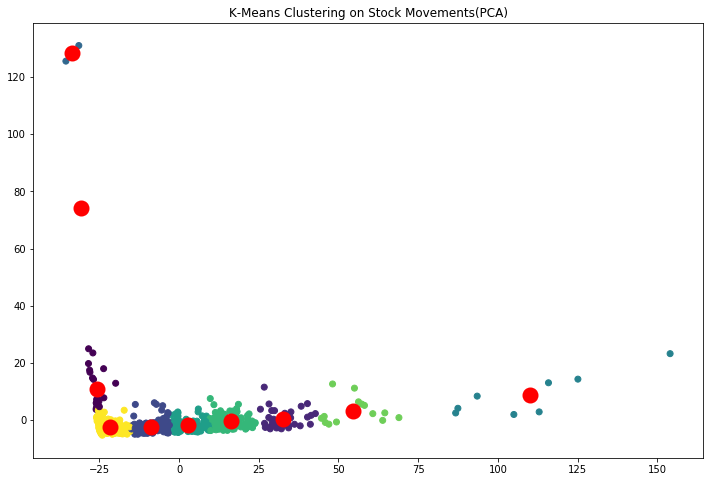

In [226]:
plt.figure(figsize=(12,8))

centers = k2.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],
           marker='o',s=169, linewidths =3, color ='r',zorder =10)
plt.scatter(m_pca[:,0],m_pca[:,1], c=labels)
plt.title('K-Means Clustering on Stock Movements(PCA)')
plt.show()

# MiniBatchKMeans

In [171]:
minikmeans = MiniBatchKMeans(n_clusters=10, batch_size = 10,max_iter = 1000).fit(m_df)
minikmeans.inertia_

117.0104107932301

In [222]:
mini2 =MiniBatchKMeans(n_clusters=10, batch_size=10, max_iter=1000).fit(m_pca)
label_pred = mini2.predict(m_pca)
print(label_pred)
print(mini2.inertia_)

[4 4 8 3 3 6 2 4 3 2 6 0 6 3 2 0 3 4 0 7 0 6 3 0 8 0 2 6 6 4 2 4 8 8 0 1 7
 3 9 2 2 3 0 4 0 4 7 4 4 7 8 6 8 1 1 6 6 0 2 1 4 4 0 0 3 0 1 2 4 9 5 4 6 0
 8 4 7 0 4 3 3 3 4 8 4 7 6 8 6 8 8 4 4 4 6 2 8 6 6 7 0 4 1 2 7 0 8 4 6 8 2
 0 8 4 6 8 8 2 4 4 0 3 4 0 8 3 1 8 7 0 6 0 4 0 4 7 6 8 8 8 7 8 6 0 4 3 7 7
 8 4 0 8 8 0 3 6 3 0 6 6 4 5 3 6 5 8 3 7 0 4 0 4 0 3 4 8 4 2 4 8 6 0 8 4 8
 4 6 4 0 4 2 4 8 8 7 1 4 8 8 7 4 3 3 4 6 9 9 3 8 4 6 7 1 0 3 4 4 4 6 7 0 0
 4 3 4 6 8 3 3 8 4 4 4 6 8 4 3 0 5 0 2 3 2 8 8 4 0 6 4 2 8 6 6 2 8 3 6 4 6
 4 4 0 7 4 6 6 3 4 8 7 6 3 1 4 8 0 4 6 0 8 7 6 8 8 0 8 3 6 5 0 0 0 6 4 4 7
 6 4 7 7 0 4 4 7 0 6 0 4 6 6 4 8 6 6 0 1 8 3 4 6 6 8 4 0 0 0 7 2 8 0 8 4 8
 0 7 4 2 4 4 8 6 7 8 8 3 4 6 0 2 6 8 8 3 0 3 4 8 7 6 4 3 6 7 0 6 3 0 3 8 3
 8 0 1 3 0 0 0 6 0 7 5 3 8 8 8 8 3 8 3 1 3 2 8 4 8 4 6 0 7 8 0 4 0 3 8 0 4
 4 7 2 7 3 7 7 8 3 5 0 7 0 6 3 3 3 0 4 0 4 0 6 3 5 6 0 3 6 0 4 4 0 8 6 3 0
 0 8 2 8 6 8 8 8 8 0 4 8 3 4 3 7 2 0 3 4 8 6 0 3 4 3 8 8 2 7 3 4 8 6 8 3 6
 7 6 1 6 6 6 6 6 4 0 3 4 

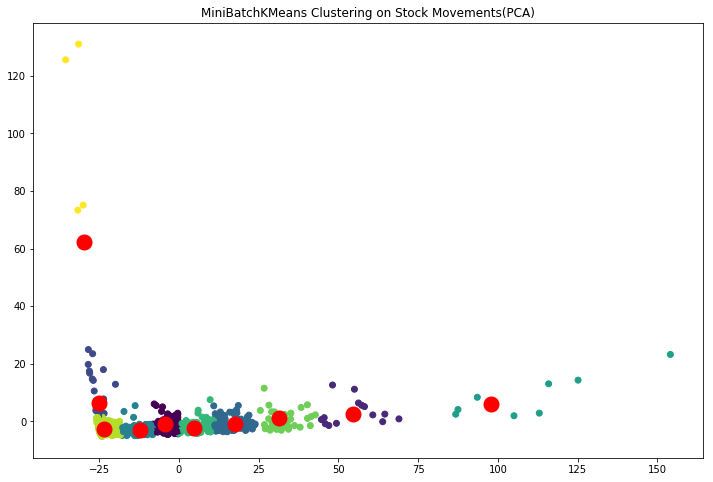

In [227]:
plt.figure(figsize=(12,8))

minicenters = mini2.cluster_centers_
plt.scatter(minicenters[:,0],minicenters[:,1],
           marker='o',s=169, linewidths =3, color ='r',zorder =10)
plt.scatter(m_pca[:,0],m_pca[:,1], c=label_pred)
plt.title('MiniBatchKMeans Clustering on Stock Movements(PCA)')
plt.show()

## kmeans - fundamental

In [401]:
# PCA fundmental features

f_pca = PCA(n_components = 10).fit_transform(f_pre_train)
print(PCA(n_components = 10).fit(f_pre_train).explained_variance_ratio_.sum())

K3 = KMeans(n_clusters = 2).fit(f_pca)
k3_labels = K3.predict(f_pca)
score = silhouette_score(f_pca,k3_labels)
print(score)


0.7791318059418815
0.5329326349525212


## Cluster.hierarchy 
* only for AgglomerativeClustering and hierarchical clustering

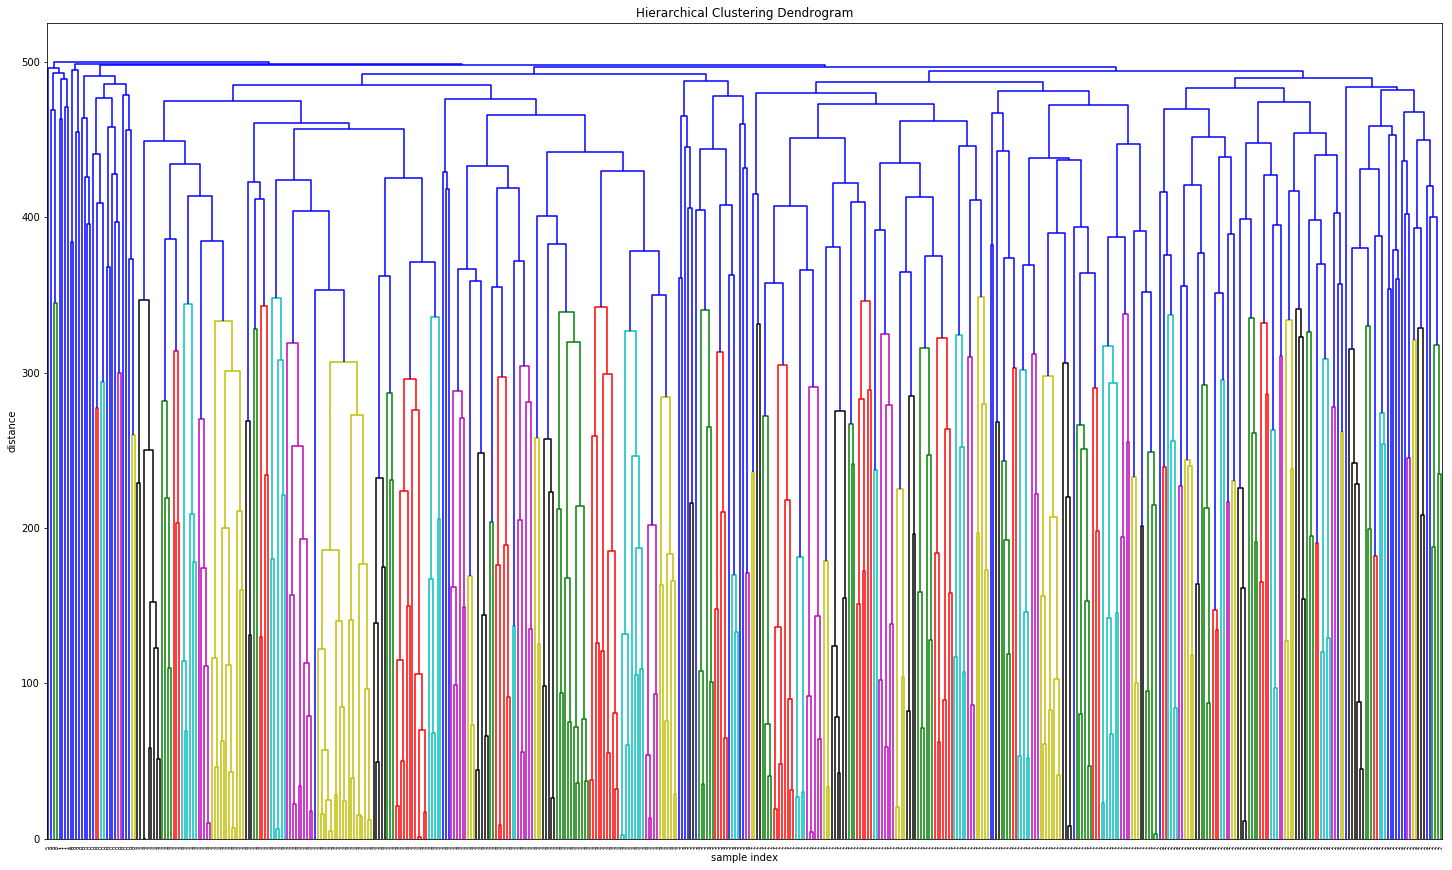

In [221]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

cl = AgglomerativeClustering(n_clusters=10,linkage='complete')
cl.fit(m_pca)

children = cl.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

plt.figure(figsize=(25, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, labels=cl.labels_)
plt.show()


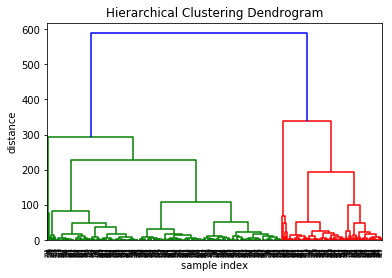

<Figure size 1800x1080 with 0 Axes>

In [397]:
Z = linkage(m_pca, 'ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.figure(figsize=(25, 15))
plt.show()

In [399]:
from scipy.cluster.hierarchy import fcluster
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')
print (clusters)

[2 2 2 6 6 4 2 3 6 2 4 4 6 6 2 4 6 2 4 7 4 4 6 4 2 4 2 4 4 3 2 3 2 2 4 7 7
 6 1 2 2 6 4 3 4 3 7 3 3 7 2 4 2 7 7 4 4 4 2 7 2 3 3 3 6 3 7 2 3 1 5 2 4 4
 2 3 7 4 3 6 6 6 3 2 3 7 4 2 4 2 2 3 3 3 4 2 2 6 4 7 4 3 7 2 7 4 2 3 4 2 2
 3 2 3 4 2 2 2 3 3 4 6 3 4 2 6 7 2 7 4 6 4 3 4 2 7 4 2 2 2 7 2 4 4 3 6 7 7
 2 2 4 2 2 4 6 4 6 4 6 4 3 5 6 4 5 2 6 7 3 3 4 3 4 6 3 2 3 2 3 2 6 4 2 3 2
 3 4 3 3 3 2 3 2 2 7 7 3 2 2 7 3 6 6 3 4 1 1 6 2 3 6 7 7 3 6 2 3 3 4 7 3 4
 3 6 2 4 2 6 6 2 2 3 3 6 2 3 6 4 5 3 2 6 2 2 2 3 4 6 3 2 2 4 6 2 2 6 4 3 4
 2 3 4 7 3 6 6 6 2 2 7 4 6 7 3 2 4 3 6 4 2 7 4 2 2 4 2 6 6 5 4 4 4 6 3 2 7
 4 3 7 7 4 2 2 7 4 4 4 3 4 4 2 2 4 6 4 7 2 6 2 4 4 2 3 4 4 4 7 2 2 4 2 3 2
 4 7 3 2 3 3 2 6 7 2 2 6 3 4 4 2 4 2 2 6 4 6 3 2 7 4 3 6 4 7 4 6 6 4 6 2 6
 2 4 7 6 3 4 3 4 4 7 5 6 2 2 2 2 6 2 6 7 6 2 2 3 2 3 6 4 7 2 4 3 3 6 2 4 2
 3 7 2 7 6 7 7 2 6 5 4 7 4 4 6 6 6 4 3 4 3 4 6 6 5 4 4 6 4 3 3 3 4 2 6 6 4
 4 2 2 2 6 2 2 2 2 4 2 2 6 3 6 7 2 4 6 3 2 4 3 6 3 6 2 2 2 7 6 3 2 6 2 6 6
 7 4 7 6 4 4 4 4 3 4 6 3 